### PS4
### Hyunwoo Roh
### MACS 30150

# Q1 
### (a) plot a histogram of percentages of the income txt data with 30 bins. 
Make sure that the bins are weighted using the normed=True option. Make sure your plot has correct x-asxis and y-axis labels as well as a plot title. 

In [104]:
import numpy as np
import scipy.stats as sts
import math
import matplotlib.pyplot as plt
%matplotlib notebook
income= np.loadtxt('incomes.txt', delimiter=',', unpack=True)

<IPython.core.display.Javascript object>


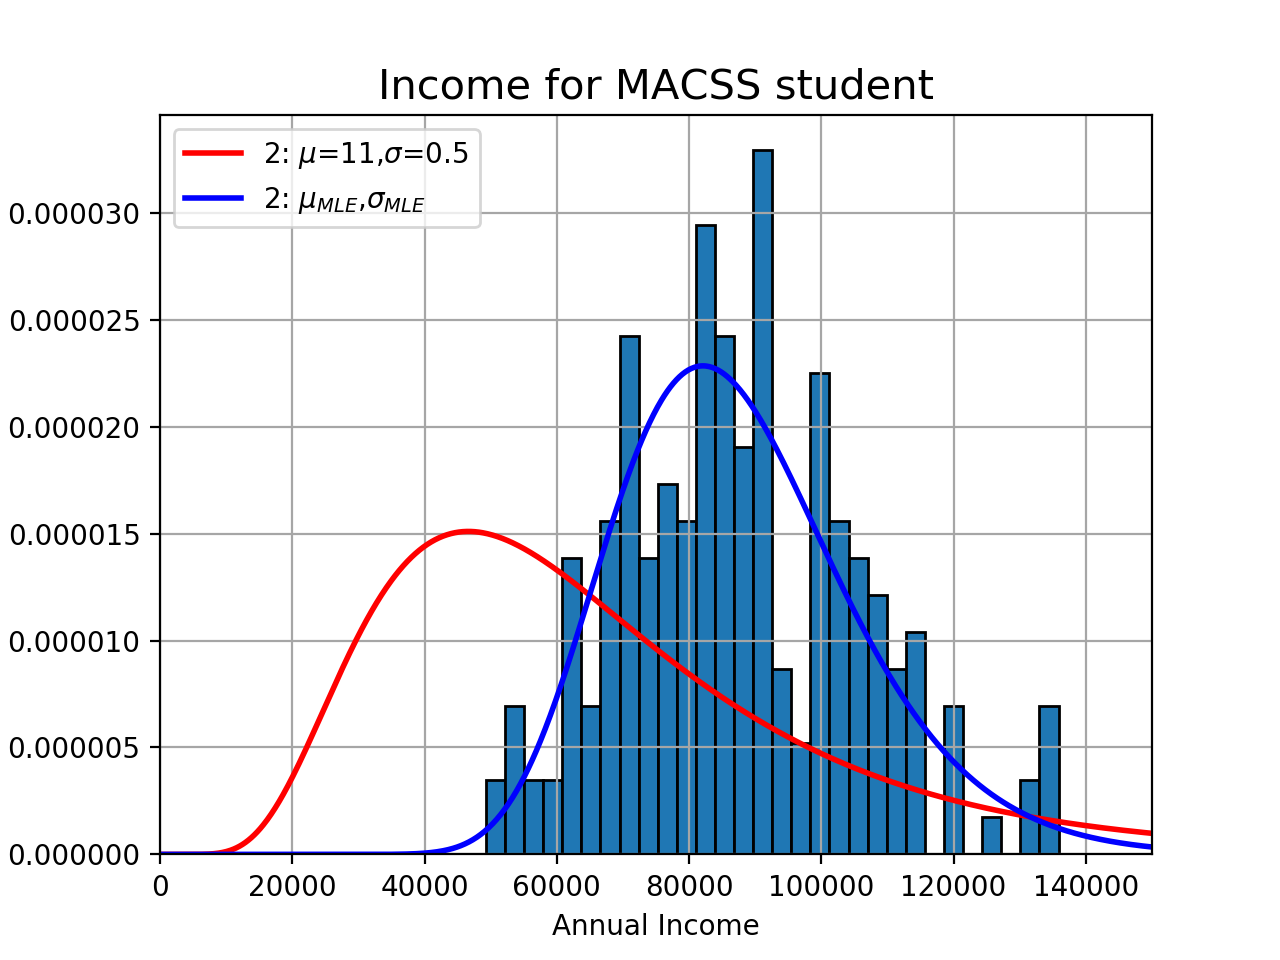

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(0, 150000)

In [117]:
plt.hist(income, 30, edgecolor='black',normed=True)
plt.title('Income for MACSS student', fontsize=15)
plt.xlabel('Annual Income')
plt.ylabel('Percentages')
plt.xlim([0,150000])

### (b) Plot the log normal PDF with mu = 11 and sigma = 0.5

In [118]:
def lnpdf(sigma, mu, xvec, cutoff):

    if cutoff == 'None':
        prob_notcut = 1.0 - sts.norm.cdf(0, loc=mu, scale=sigma)
    else:
        prob_notcut = (sts.norm.cdf(cutoff, loc=mu, scale=sigma) -
                       sts.norm.cdf(0, loc=mu, scale=sigma))
            
    pdf_vals    = (1/(xvec*sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (np.log(xvec) - mu)**2 / (2 * sigma**2))  /prob_notcut)

    return pdf_vals

dist_pts = np.linspace(0.01, 150000, 1000)
mu_1 = 11.0
sig_1 = 0.5
pdf_vals = lnpdf(0.5,11.0,dist_pts,150000) #, plot=False

plt.plot(dist_pts, pdf_vals,linewidth=2, color='R', label='2: $\mu$=11,$\sigma$=0.5')
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.legend(loc='upper left')

### (b) What is the value of the log likelihood value for this parametrization of the distribution and given this data?

In [119]:
def log_truncnorm(xvals, mu, sigma, cutoff):
    pdf_vals = lnpdf(sigma, mu, xvals, cutoff)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

log_truncnorm(income,mu_1,sig_1,150000)

-2385.856997808558

### (c) Estimate the parameters of the lognormal by maximum likelihood and plot its PDF aginast the PDF from the (b) and the histogram from part (a)

#### Report the ML estimates for mu and sigma

In [120]:
def crit(params, *args):
    mu, sigma = params
    xvals, cutoff = args
    log_lik_val = log_truncnorm(xvals, mu, sigma, cutoff)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val
import scipy.optimize as opt
mu_init = mu_1
sig_init = sig_1
params_init = np.array([mu_init, sig_init])
mle_args = (incomes, 150000)
results = opt.minimize(crit, params_init, args=(mle_args), 
                       bounds=((0.1, None), (0.1, None)))
mu_MLE, sig_MLE = results.x
print('MLE estimates for mu =', mu_MLE, ' MLE estimates for sigma =', sig_MLE)

MLE estimates for mu = 11.359024396734544  MLE estimates for sigma = 0.20817853015560012


#### Report the value of the likelihood function

In [121]:
plt.plot(dist_pts, lnpdf(sig_MLE,mu_MLE,dist_pts,150000),linewidth=2, color='b', label='2: $\mu_{MLE}$,$\sigma_{MLE}$')
plt.grid(b=True, which='major', color='0.65', linestyle='-')
# plt.title(f'Plot of Log Normal PDF with sigma={sig_1} and mean={mu_1}')
# plt.ylabel(r' (\$000s)')
plt.legend(loc='upper left')
print (f"value of the likelihood function: {log_truncnorm(incomes,mu_MLE,sig_MLE,150000)}")

value of the likelihood function: -2241.71930136852


In [109]:
OffDiagNeg = np.array([[1, -1], [-1, 1]])
vcv_mle = results.hess_inv.todense() * OffDiagNeg
stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])
print('Variance Covariance Matrix = ', vcv_mle)
print('S.E for mu estimate = ', stderr_mu_mle)
print('S.E for sigma estimate = ', stderr_sig_mle)

Variance Covariance Matrix =  [[ 2.52831353e-04 -2.76208826e-05]
 [-2.76208826e-05  1.30457089e-04]]
S.E for mu estimate =  0.015900671477681493
S.E for sigma estimate =  0.011421781336457357


### (d) Perform a likelihood ratio test to determine the probability that the data in income.txt

In [110]:
log_lik_h0 = log_truncnorm(incomes, mu_1, sig_1,150000)
log_lik_mle = log_truncnorm(incomes, mu_MLE, sig_MLE,150000)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print(f'chi squared of H0 with 2 degrees of freedom p-value = {pval_h0}')
print (f'mu is probably not {mu_1} and sigma is p not {sig_1}')

chi squared of H0 with 2 degrees of freedom p-value = 0.0
mu is probably not 11.0 and sigma is p not 0.5


With p-value less than 0.05, we reject the null hypothesis at 0.05 level so that the income data is unlikely to have the distribution as in part b.

### (e) what is the probability that you will earn more than 100k / less than 75k?

In [111]:
def lgnorm_cdf(xvals, mu, sigma):
   
    cdf_vals_ln = sts.norm.cdf(np.log(xvals), loc = mu, scale = sigma)
    
    return cdf_vals_ln

print('Probability to earn more than $100,000:', 1-lgnorm_cdf(100000, mu_MLE, sig_MLE))
print('Probability to earn less than $75,000:', lgnorm_cdf(75000, mu_MLE, sig_MLE))

Probability to earn more than $100,000: 0.22987018055816688
Probability to earn less than $75,000: 0.2602332979233355


## Q2
### Linear regression and MLE
sick = beta0 + beta1*age + beta2*children + beta3*temp_winter + epsilon, epsilon ~ N(0,sigma^2) 

In [112]:
sick = np.loadtxt('sick.txt', skiprows=1, delimiter=',')
sick_week = sick[:,0]
sick_age = sick[:,1]
sick_children = sick[:,2]
sick_avg_tem = sick[:,3]

### (a) Estimate the 5 parameters of the model: 4 betas and sigma

In [113]:
def crit_LR(params, *args):
    
    beta_0, beta_1, beta_2, beta_3, sigma = params
    s_week, s_age, s_children, s_avg_tem = args
    n = len(s_week)
    sigma2 = sigma * sigma
    xvals = s_week - beta_0 - beta_1 * s_age - beta_2 * s_children - beta_3 * s_avg_tem
    log_lik_val = -n/2*np.log(2*np.pi*sigma2) - 1/(2*sigma2)*(xvals).T @ (xvals)
    neg_log_lik_val = -log_lik_val
                         
    return neg_log_lik_val

def log_lik(xvals, mu, sigma):
    pdf_vals = sts.norm.pdf(xvals, loc = mu, scale = sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

In [114]:
params_init = np.array([0,0,0,0,1])
LR_args = (sick_week, sick_age, sick_children, sick_avg_tem)
result_2 = opt.minimize(crit_LR, params_init, args=LR_args, method = 'BFGS')
b_0_LR, b_1_LR, b_2_LR, b_3_LR, sig_0_LR = result_2.x
sig_0_LR = np.absolute(sig_0_LR)

res = sick_week - b_0_LR - b_1_LR * sick_age - b_2_LR * sick_children - b_3_LR * sick_avg_tem

h_inv = result_2.hess_inv
OffDiagNeg = -np.ones(h_inv.shape) + np.eye(h_inv.shape[0])*2
print("Parameters are:", b_0_LR, b_1_LR, b_2_LR, b_3_LR,sig_0_LR*sig_0_LR)
print("The value of the log likelihood function", log_lik(res, 0, sig_0_LR))
print("The estimated variance covariance matrix is:", result_2.hess_inv)

Parameters are: 0.25164560772710254 0.012933462985135511 0.400500997678411 -0.0099917177641458 9.108909643248346e-06
The value of the log likelihood function 876.8650571201374
The estimated variance covariance matrix is: [[ 7.56824800e-07  6.33926516e-09 -1.44925828e-07 -1.71461927e-08
  -1.90372241e-08]
 [ 6.33926516e-09  3.02891515e-09 -2.61180719e-08 -1.93171819e-09
   8.30276324e-11]
 [-1.44925828e-07 -2.61180719e-08  2.63096350e-07  1.73453931e-08
   1.02814271e-09]
 [-1.71461927e-08 -1.93171819e-09  1.73453931e-08  1.51141517e-09
   2.85012569e-10]
 [-1.90372241e-08  8.30276324e-11  1.02814271e-09  2.85012569e-10
   1.89164552e-08]]


$\beta_0$ = 0.25
$\beta_1$ = 0.013
$\beta_2$ = 0.4
$\beta_3$ = - 0.00999
$\sigma^2$ = 0.0000091
The value of likelihood function is 876.865.

### (b) Use a likelihood ratio test to determine the probability that beta_0 = 1, sigma =0.1 and others equal to 0.

In [115]:
res_2 = sick_week - 1 

log_lik_h0_2 = log_lik(res_2, 0, 0.1)
log_lik_mle_2 = log_lik(res, 0, sig_0_LR)
LR_val_2 = 2 * (log_lik_mle_2 - log_lik_h0_2)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val_2, 5)

print('The p_value is', pval_h0)

The p_value is 0.0


Since the chi squared of $H_0$ with 5 degrees of freedom p-value is less than 0.5, we reject the null hypothesis at 0.05 level 

$H_0$: $\beta_0$ = 1.0, $\sigma^2$ = 0.01 and $\beta_1$ , $\beta_2$ , $\beta_3$ = 0.